# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [1]:
# WRITE YOUR CODE HERE
set.seed(1)
X = c(rnorm(100))
e = c(rnorm(100))
Y = 4 + 3*X + 2*X^2 + X^3 + e
data = data.frame(X,e,Y)
head(data)

,X,e,Y
,<dbl>,<dbl>,<dbl>
1,-0.6264538,-0.62036668,2.039312
2,0.1836433,0.04211587,4.666689
3,-0.8356286,-0.91092165,1.395244
4,1.5952808,0.15802877,18.093576
5,0.3295078,-0.65458464,4.586866
6,-0.8204684,1.76728727,4.099905


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [2]:
# WRITE YOUR CODE HERE
library(leaps)
reg = regsubsets(Y~poly(X,10,raw=TRUE),data)
summary = summary(reg)
summary

Warning message:
"package 'leaps' was built under R version 4.2.3"


Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10, raw = TRUE), data)
10 Variables  (and intercept)
                          Forced in Forced out
poly(X, 10, raw = TRUE)1      FALSE      FALSE
poly(X, 10, raw = TRUE)2      FALSE      FALSE
poly(X, 10, raw = TRUE)3      FALSE      FALSE
poly(X, 10, raw = TRUE)4      FALSE      FALSE
poly(X, 10, raw = TRUE)5      FALSE      FALSE
poly(X, 10, raw = TRUE)6      FALSE      FALSE
poly(X, 10, raw = TRUE)7      FALSE      FALSE
poly(X, 10, raw = TRUE)8      FALSE      FALSE
poly(X, 10, raw = TRUE)9      FALSE      FALSE
poly(X, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         poly(X, 10, raw = TRUE)1 poly(X, 10, raw = TRUE)2
1  ( 1 ) " "                      " "                     
2  ( 1 ) "*"                      " "                     
3  ( 1 ) "*"                      "*"                     
4  ( 1 ) "*"                      "*"                     
5  ( 1 ) "*

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

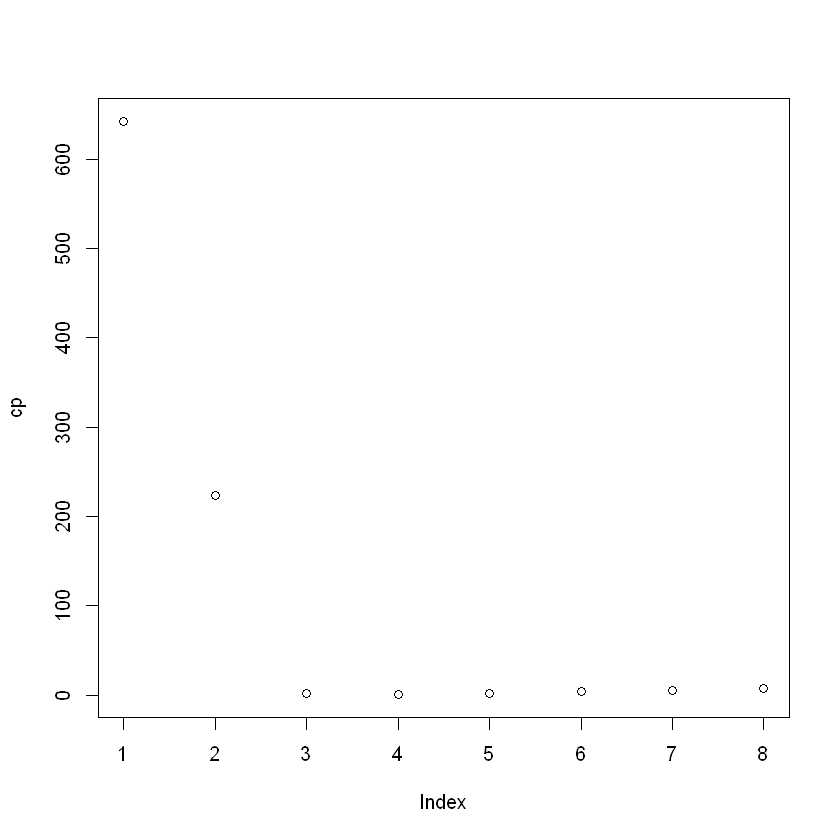

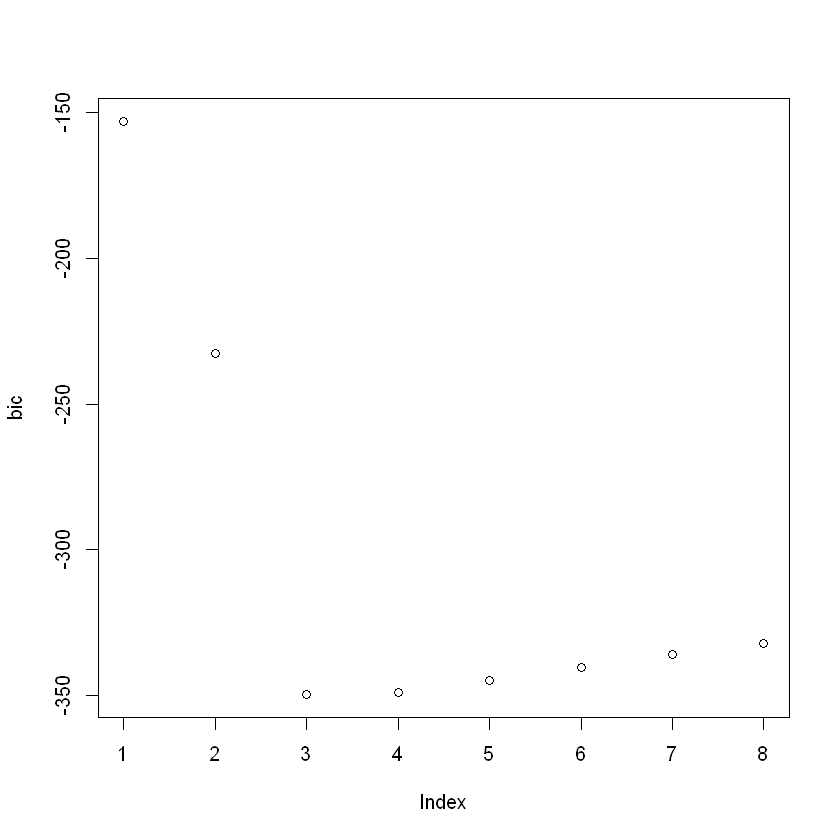

[1] 4

[1] 3

[1] 4

(Intercept) poly(X, 10, raw = TRUE)1 poly(X, 10, raw = TRUE)2 
              4.07200775               3.38745596               1.84575641 
poly(X, 10, raw = TRUE)3 poly(X, 10, raw = TRUE)5 
              0.55797426               0.08072292

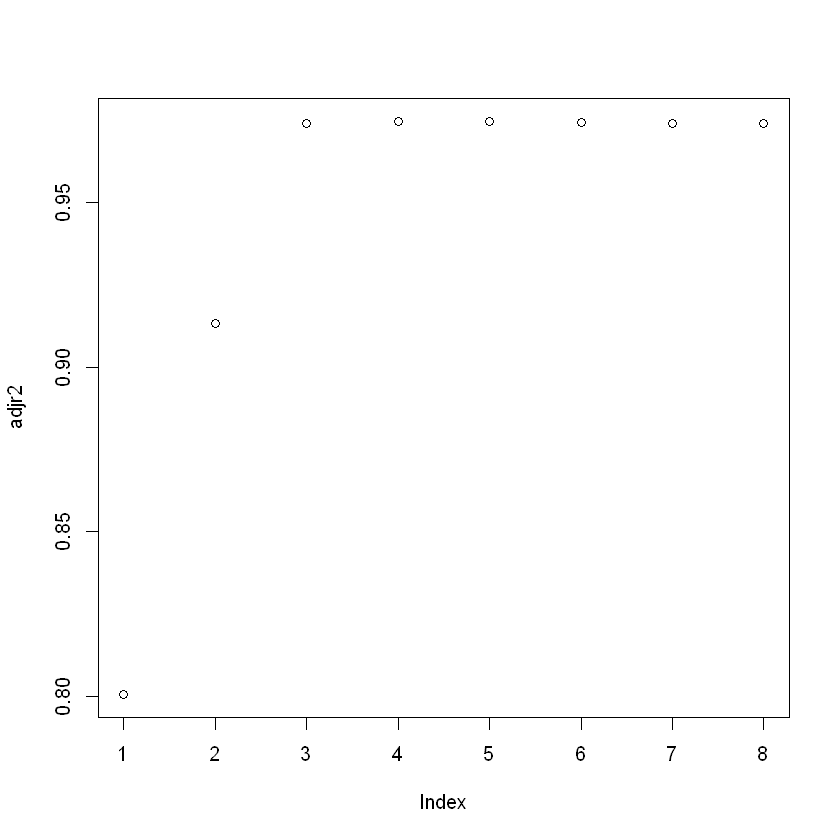

In [3]:
# WRITE YOUR CODE HERE
cp = c(summary$cp)
bic = c(summary$bic)
adjr2 = c(summary$adjr2)

plot(cp)
plot(bic)
plot(adjr2)

which.min(summary$cp)
which.min(summary$bic)
which.max(summary$adjr2)

coef(reg,4)

> The model is Y = 4.07 + 3.39X + 1.85X^2 + 0.56X^3 + 0.08X^4

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10, raw = TRUE), data, method = "forward")
10 Variables  (and intercept)
                          Forced in Forced out
poly(X, 10, raw = TRUE)1      FALSE      FALSE
poly(X, 10, raw = TRUE)2      FALSE      FALSE
poly(X, 10, raw = TRUE)3      FALSE      FALSE
poly(X, 10, raw = TRUE)4      FALSE      FALSE
poly(X, 10, raw = TRUE)5      FALSE      FALSE
poly(X, 10, raw = TRUE)6      FALSE      FALSE
poly(X, 10, raw = TRUE)7      FALSE      FALSE
poly(X, 10, raw = TRUE)8      FALSE      FALSE
poly(X, 10, raw = TRUE)9      FALSE      FALSE
poly(X, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         poly(X, 10, raw = TRUE)1 poly(X, 10, raw = TRUE)2
1  ( 1 ) " "                      " "                     
2  ( 1 ) " "                      "*"                     
3  ( 1 ) "*"                      "*"                     
4  ( 1 ) "*"                      "*"                

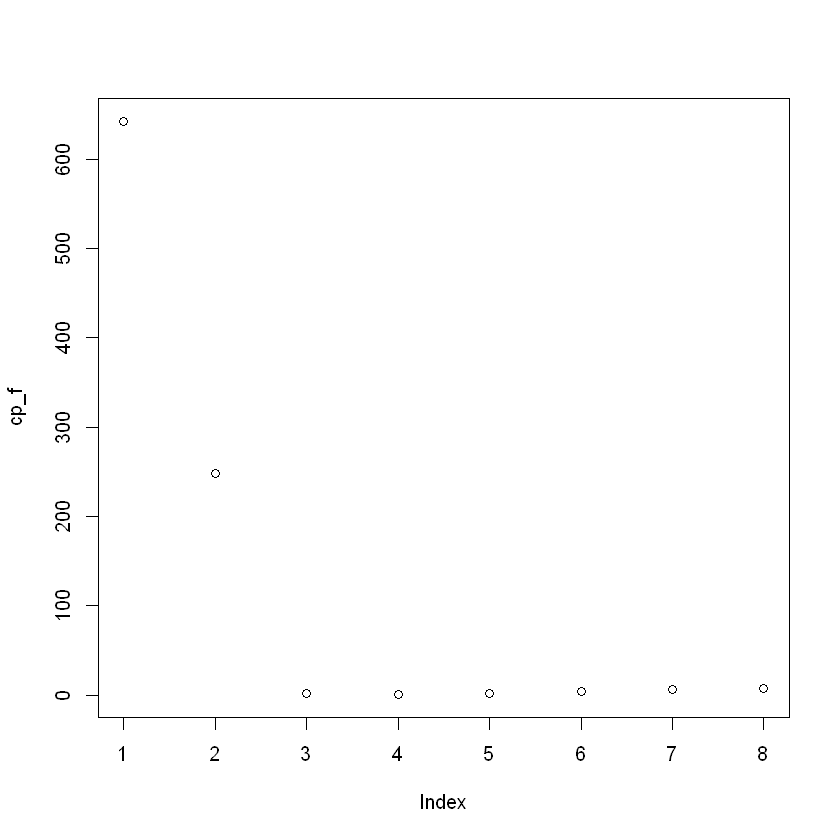

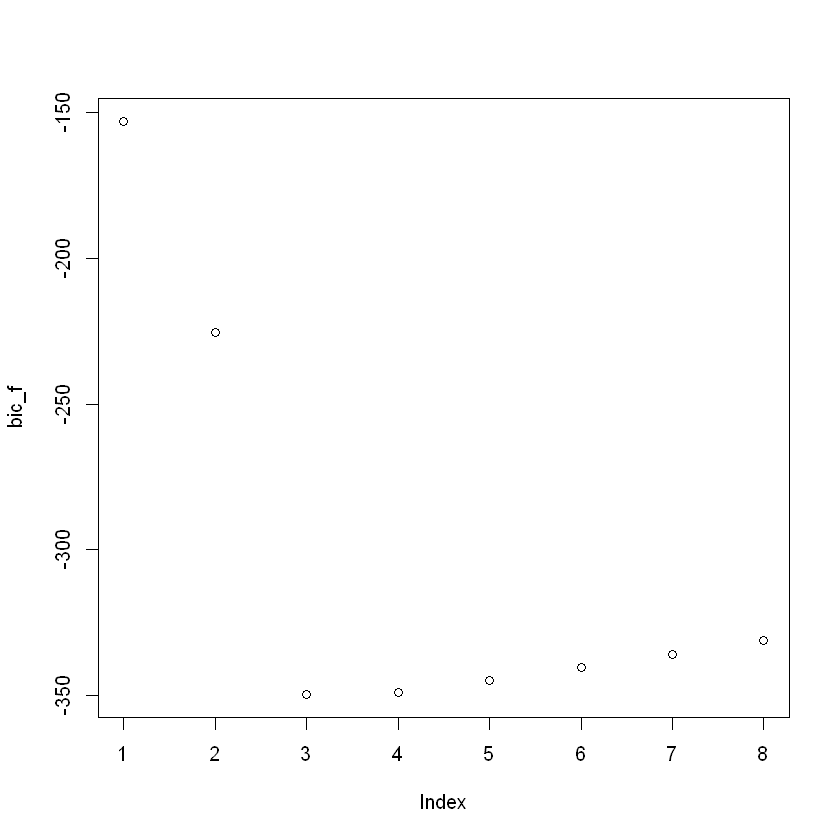

[1] 4

[1] 3

[1] 4

(Intercept) poly(X, 10, raw = TRUE)1 poly(X, 10, raw = TRUE)2 
              4.07200775               3.38745596               1.84575641 
poly(X, 10, raw = TRUE)3 poly(X, 10, raw = TRUE)5 
              0.55797426               0.08072292

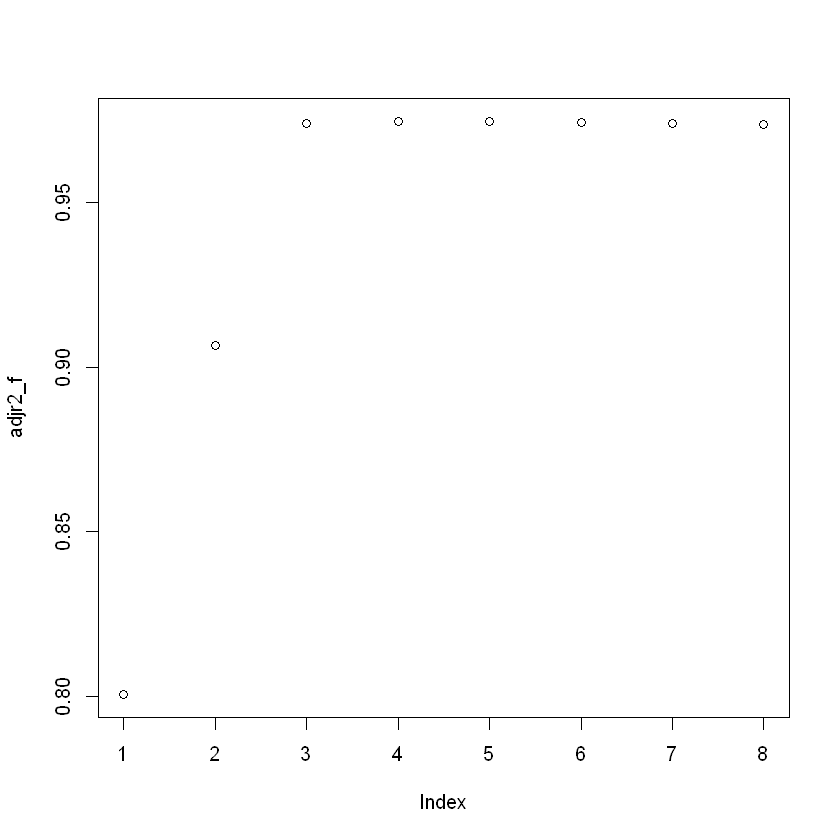

In [4]:
# WRITE YOUR CODE HERE
reg_f = regsubsets(Y~poly(X,10,raw=TRUE),data,method="forward")
summary_f = summary(reg_f)
summary_f

cp_f = c(summary_f$cp)
bic_f = c(summary_f$bic)
adjr2_f = c(summary_f$adjr2)

plot(cp_f)
plot(bic_f)
plot(adjr2_f)

which.min(summary_f$cp)
which.min(summary_f$bic)
which.max(summary_f$adjr2)

coef(reg_f,4)

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10, raw = TRUE), data, method = "backward")
10 Variables  (and intercept)
                          Forced in Forced out
poly(X, 10, raw = TRUE)1      FALSE      FALSE
poly(X, 10, raw = TRUE)2      FALSE      FALSE
poly(X, 10, raw = TRUE)3      FALSE      FALSE
poly(X, 10, raw = TRUE)4      FALSE      FALSE
poly(X, 10, raw = TRUE)5      FALSE      FALSE
poly(X, 10, raw = TRUE)6      FALSE      FALSE
poly(X, 10, raw = TRUE)7      FALSE      FALSE
poly(X, 10, raw = TRUE)8      FALSE      FALSE
poly(X, 10, raw = TRUE)9      FALSE      FALSE
poly(X, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         poly(X, 10, raw = TRUE)1 poly(X, 10, raw = TRUE)2
1  ( 1 ) "*"                      " "                     
2  ( 1 ) "*"                      " "                     
3  ( 1 ) "*"                      " "                     
4  ( 1 ) "*"                      " "              

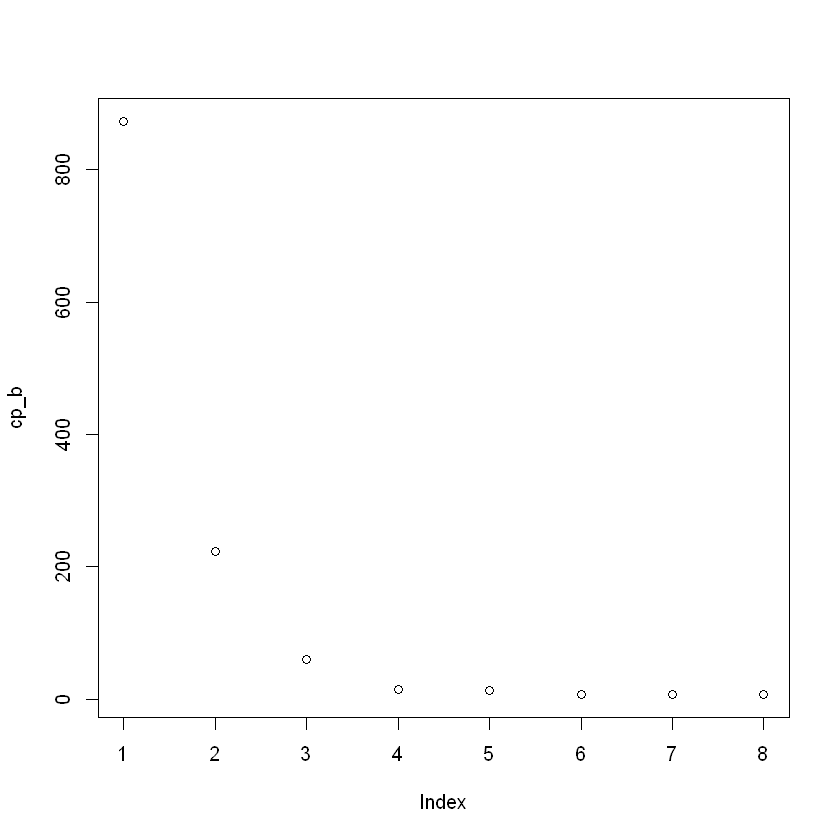

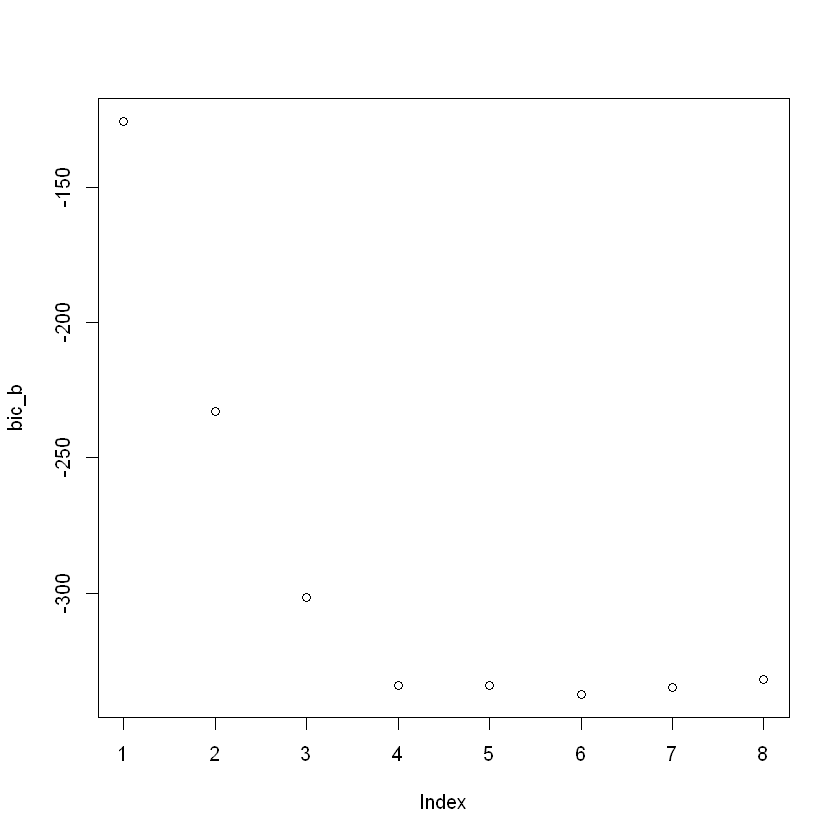

[1] 6

[1] 6

[1] 8

(Intercept)  poly(X, 10, raw = TRUE)1  poly(X, 10, raw = TRUE)4 
                4.2675220                 3.8935377                 3.0637033 
 poly(X, 10, raw = TRUE)5  poly(X, 10, raw = TRUE)6  poly(X, 10, raw = TRUE)8 
                0.1839651                -1.7886013                 0.4132643 
poly(X, 10, raw = TRUE)10 
               -0.0324920

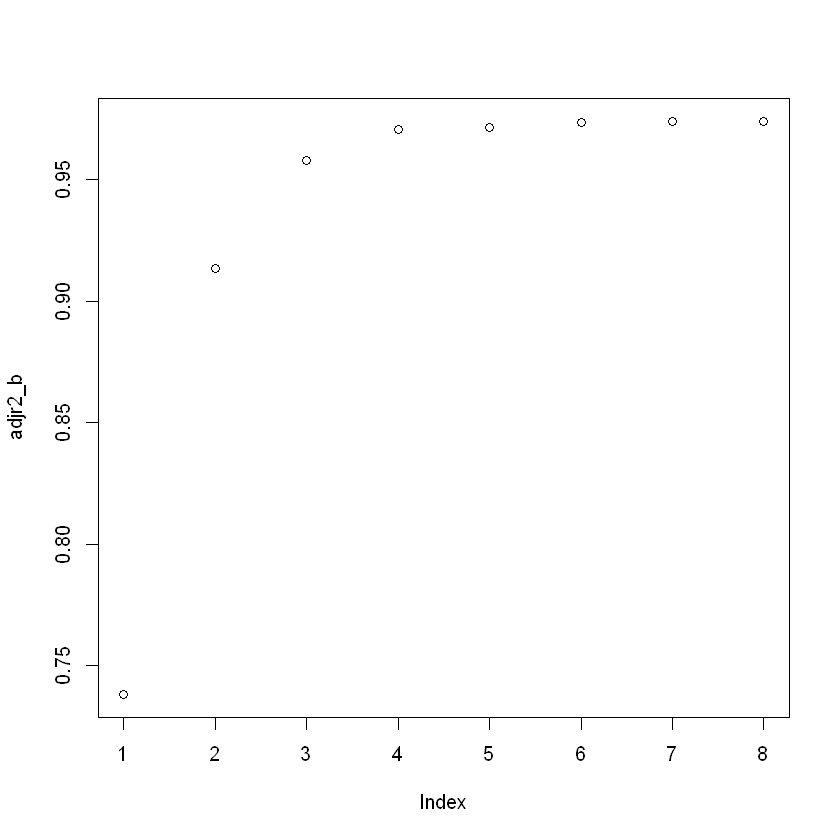

In [5]:
# WRITE YOUR CODE HERE
reg_b = regsubsets(Y~poly(X,10,raw=TRUE),data,method="backward")
summary_b = summary(reg_b)
summary_b

cp_b = c(summary_b$cp)
bic_b = c(summary_b$bic)
adjr2_b = c(summary_b$adjr2)

plot(cp_b)
plot(bic_b)
plot(adjr2_b)

which.min(summary_b$cp)
which.min(summary_b$bic)
which.max(summary_b$adjr2)

coef(reg_b,6)

c) Compare your results from parts a and b with those of question 1.

> The forward selection gave the same results as the exhaustive one. The backward selection gave a different best model using X, X^4, X^5, X^6, X^8, and X^10

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [49]:
# WRITE YOUR CODE HERE
set.seed(1)
X = matrix(NA,nrow=1000,ncol=20)
for (i in 1:20){
    X[,i] = rnorm(1000)
}
colnames(X) = c(paste("X",1:20))
head(X)

e = rnorm(1000)
head(e)

B = runif(20)
zero = sample(1:20,5)
B[zero] = 0
B

Y = (X %*% B) + e
colnames(Y) = "Y"
head(Y)

data2 = data.frame(cbind(Y,X,e))
head(data2)

train = sample(1:nrow(data2),100)
test = (-train)

X 1,X 2,X 3,X 4,X 5,X 6,X 7,X 8,X 9,X 10,X 11,X 12,X 13,X 14,X 15,X 16,X 17,X 18,X 19,X 20
-0.6264538,1.13496509,-0.88614959,0.7391149,-1.1346302,-1.5163733,-0.61882708,-1.3254177,0.2637034,-1.2171201,-0.8043316,-1.4115219,-0.93910663,0.2264537,0.5232667,-0.2139090,0.8576341,1.0496171,0.9514099,-2.07771241
0.1836433,1.11193185,-1.92225490,0.3866087,0.7645571,0.6291412,-1.10942196,0.9519797,-0.8294518,-0.9462293,-1.0565257,1.0838697,1.39366493,-0.8185942,0.9935537,-0.1067233,-1.6253951,0.2903237,0.4570987,-0.45446091
-0.8356286,-0.87077763,1.61970074,1.2963972,0.5707101,-1.6781940,-2.17033523,0.8600044,-1.4616348,0.0914098,-1.0353958,1.1702224,1.62581486,-0.8471526,0.2737370,-0.4645893,-0.2342783,1.2421262,-0.3586935,-0.16555991
1.5952808,0.21073159,0.51926990,-0.8035584,-1.3516939,1.1797811,-0.03130307,1.0607903,1.6839902,0.7013513,-1.1855604,0.2947545,0.40900106,-1.9843326,-0.6949193,-0.6842725,-1.0326545,-0.6850857,-1.0458614,0.89765209
0.3295078,0.06939565,-0.05584993,-1.6026257,-2.0298855,1.1176545,-0.26039848,-0.3505840,-1.5443243,0.6734224,-0.5004395,-0.5544277,-0.09255856,-0.8127788,-0.7180502,-0.7908007,-1.1411412,-0.6677681,0.3075345,-0.02948916
-0.8204684,-1.66264885,0.69641761,0.9332510,0.5904787,-1.2377359,0.53443047,-0.1307656,-0.1908871,1.2655534,-0.5249887,-0.4034407,0.20609871,1.4616707,-0.1019895,-0.3389638,-1.5219369,0.9409138,1.9943876,1.85838843


[1]  0.2353485  0.2448250 -0.6421869 -1.9348085  1.0386957 -0.2835501

[1] 0.726110490 0.000000000 0.002827729 0.941650527 0.572021482 0.883971442
 [7] 0.000000000 0.207158200 0.761758723 0.000000000 0.876419525 0.740631339
[13] 0.599081832 0.105408210 0.135853268 0.328763283 0.645211214 0.498389847
[19] 0.000000000 0.000000000

Y
-2.8010455
1.1169222
-0.9195718
-1.8713950
-4.0704756
-2.0470835


,Y,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,⋯,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20,e
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-2.8010455,-0.6264538,1.13496509,-0.88614959,0.7391149,-1.1346302,-1.5163733,-0.61882708,-1.3254177,0.2637034,⋯,-1.4115219,-0.93910663,0.2264537,0.5232667,-0.2139090,0.8576341,1.0496171,0.9514099,-2.07771241,0.2353485
2,1.1169222,0.1836433,1.11193185,-1.92225490,0.3866087,0.7645571,0.6291412,-1.10942196,0.9519797,-0.8294518,⋯,1.0838697,1.39366493,-0.8185942,0.9935537,-0.1067233,-1.6253951,0.2903237,0.4570987,-0.45446091,0.2448250
3,-0.9195718,-0.8356286,-0.87077763,1.61970074,1.2963972,0.5707101,-1.6781940,-2.17033523,0.8600044,-1.4616348,⋯,1.1702224,1.62581486,-0.8471526,0.2737370,-0.4645893,-0.2342783,1.2421262,-0.3586935,-0.16555991,-0.6421869
4,-1.8713950,1.5952808,0.21073159,0.51926990,-0.8035584,-1.3516939,1.1797811,-0.03130307,1.0607903,1.6839902,⋯,0.2947545,0.40900106,-1.9843326,-0.6949193,-0.6842725,-1.0326545,-0.6850857,-1.0458614,0.89765209,-1.9348085
5,-4.0704756,0.3295078,0.06939565,-0.05584993,-1.6026257,-2.0298855,1.1176545,-0.26039848,-0.3505840,-1.5443243,⋯,-0.5544277,-0.09255856,-0.8127788,-0.7180502,-0.7908007,-1.1411412,-0.6677681,0.3075345,-0.02948916,1.0386957
6,-2.0470835,-0.8204684,-1.66264885,0.69641761,0.9332510,0.5904787,-1.2377359,0.53443047,-0.1307656,-0.1908871,⋯,-0.4034407,0.20609871,1.4616707,-0.1019895,-0.3389638,-1.5219369,0.9409138,1.9943876,1.85838843,-0.2835501


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [ ]:
# WRITE YOUR CODE HERE
reg2 = regsubsets(Y~ . - e,data=data2[train,],nvmax=21)
test = model.matrix(Y ~ . - e, data2[test,])
err = rep(NA,20)
for (n in 1:20){
    coef = coef(reg2,n)
    pred = test[,names(coef)]%*%coef
    err[n] = mean((test$Y-pred)^2)
}

mse = (1/100) * summary(reg2)$rss
plot(mse)
plot(err)

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [74]:
# WRITE YOUR CODE HERE

,X.6
,<dbl>
1,-1.516373


> *Write your response here* 
> 

**DUE:** 5pm EST, April 10, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*